- This note book is to summarize the performance of active learning campaign

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pickle
import time
import pandas as pd
import numpy as np
from scipy.stats import entropy
from Active_learning import *

In [3]:
from utils import *
from Vesicle_detection import Multi_template_match_plot
from batch_run import run_batch_files_templates_plot

In [4]:
def cal_entropy(data):
    entropies = []
    for row in data:
        # Replace 0 values with a small non-zero value (e.g., machine epsilon)
        row_nonzero = np.where(row == 0, np.finfo(float).eps, row)

        # Calculate entropy for the current row
        entropy_value = entropy(row_nonzero, base=2)

        # Append the entropy value to the list
        entropies.append(entropy_value)

    return np.array(entropies)

In [ ]:
# Loading model

In [6]:
import pickle
import time

In [7]:
df_sample = pd.read_csv('df_sample_20240512.csv')

In [14]:
df_sample.shape

(10000000, 7)

In [5]:
# Load the model from the file
with open('GPC_model_20240513.pkl', 'rb') as file:
    model1 = pickle.load(file)

In [6]:
with open('GPC_model_20240520.pkl', 'rb') as file:
    model2 = pickle.load(file)

In [7]:
# Load the model from the file
with open('GPC_model_20240526.pkl', 'rb') as file:
    model3 = pickle.load(file)

In [8]:
with open('GPC_model_20240601.pkl', 'rb') as file:
    model4 = pickle.load(file)

In [9]:
with open('GPC_model_20240607.pkl', 'rb') as file:
    model5 = pickle.load(file)

In [10]:
with open('GPC_model_20240713.pkl', 'rb') as file:
    model6 = pickle.load(file)

In [11]:
model3.kernel_.get_params()

{'k1': 5.22**2,
 'k2': RBF(length_scale=2.1),
 'k1__constant_value': 27.245044600856268,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': 2.1031118029259597,
 'k2__length_scale_bounds': (1e-05, 100000.0)}

In [7]:
model4.kernel_.get_params()

{'k1': 4.65**2,
 'k2': RBF(length_scale=1.43),
 'k1__constant_value': 21.64464276979812,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': 1.4320513613916066,
 'k2__length_scale_bounds': (1e-05, 100000.0)}

In [6]:
model5.kernel_.get_params()

{'k1': 4.36**2,
 'k2': RBF(length_scale=1.08),
 'k1__constant_value': 19.042247957762708,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': 1.0821779901990118,
 'k2__length_scale_bounds': (1e-05, 100000.0)}

In [45]:
model6.kernel_.get_params()

{'k1': 3.29**2,
 'k2': RBF(length_scale=0.813),
 'k1__constant_value': 10.798057753693321,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': 0.8131575818404284,
 'k2__length_scale_bounds': (1e-05, 100000.0)}

In [26]:
start_time = time.time()

# Your code snippet
pred_prob = model2.predict_proba(df_sample)

# Record end time
end_time = time.time()

# Calculate running time
running_time = end_time - start_time
print("Running time:", running_time, "seconds")

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianProcessClassifier was fitted without feature names
  warnings.warn(
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

Running time: 343.14616894721985 seconds


In [29]:
entropy_value2 = cal_entropy(pred_prob)
entropy_value2.sum()

6215625.23913797

In [9]:
start_time = time.time()

pred_prob = model3.predict_proba(df_sample.values)

# Record end time
end_time = time.time()

# Calculate running time
running_time = end_time - start_time
print("Running time:", running_time, "seconds")

Running time: 463.96136498451233 seconds


In [10]:
entropy_value3 = cal_entropy(pred_prob)
entropy_value3.sum()

5389691.850804273

In [ ]:
start_time = time.time()

pred_prob = model4.predict_proba(df_sample.values)

# Record end time
end_time = time.time()

# Calculate running time
running_time = end_time - start_time
print("Running time:", running_time, "seconds")

In [7]:
# This cost too much memory, and it cause kernel die
# So we split the process and accelerate the calculations

batch_size = 100000  # Define a suitable batch size
num_batches = len(df_sample) // batch_size

pred_probs = []

start_time = time.time()

for i in range(num_batches + 1):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df_sample))
    
    if start_idx >= len(df_sample):
        break
    
    batch = df_sample.values[start_idx:end_idx]
    pred_probs_batch = model4.predict_proba(batch)
    pred_probs.extend(pred_probs_batch)

# Convert the list of probabilities back to a numpy array if needed
pred_probs = np.array(pred_probs)

end_time = time.time()

running_time = end_time - start_time
print("Running time:", running_time, "seconds")


Running time: 42.177720069885254 seconds


In [9]:
pred_probs.shape

(10000000, 2)

In [11]:
entropy_value4 = cal_entropy(pred_probs)
entropy_value4.sum()

5134646.987264483

In [ ]:
# AL round 1

In [46]:
pred_probs1 = cal_prob(df_sample, model1, batch_size=100000)
entropy_value1 = cal_entropy(pred_probs1)
entropy_value1.sum()

Running time: 18.34307885169983 seconds


7516738.705192391

In [ ]:
# AL round 2

In [47]:
pred_probs2 = cal_prob(df_sample, model2, batch_size=100000)
entropy_value2 = cal_entropy(pred_probs2)
entropy_value2.sum()

Running time: 24.069232940673828 seconds


6215625.23913797

In [ ]:
# AL round 3

In [48]:
pred_probs3 = cal_prob(df_sample, model3, batch_size=100000)
entropy_value3 = cal_entropy(pred_probs3)
entropy_value3.sum()

Running time: 36.586540937423706 seconds


5389691.850804273

In [ ]:
# AL round 4

In [49]:
pred_probs4 = cal_prob(df_sample, model4, batch_size=100000)
entropy_value4 = cal_entropy(pred_probs4)
entropy_value4.sum()

Running time: 42.03801918029785 seconds


5134646.987264483

In [ ]:
# AL round 5

In [50]:
pred_probs5 = cal_prob(df_sample, model5, batch_size=100000)
entropy_value5 = cal_entropy(pred_probs5)
entropy_value5.sum()

Running time: 49.860491037368774 seconds


5480103.377297678

In [ ]:
# AL round 6

In [51]:
pred_probs6 = cal_prob(df_sample, model6, batch_size=100000)
entropy_value6 = cal_entropy(pred_probs6)
entropy_value6.sum()

Running time: 57.330337047576904 seconds


6631983.190656676

In [64]:
def histogram_log(probs):
    second_column = probs[:, 1]
    # base = 10
    plt.hist(second_column, log=True)

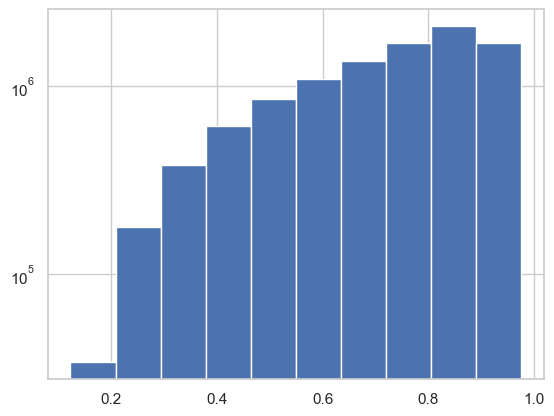

In [67]:
histogram_log(pred_probs1);

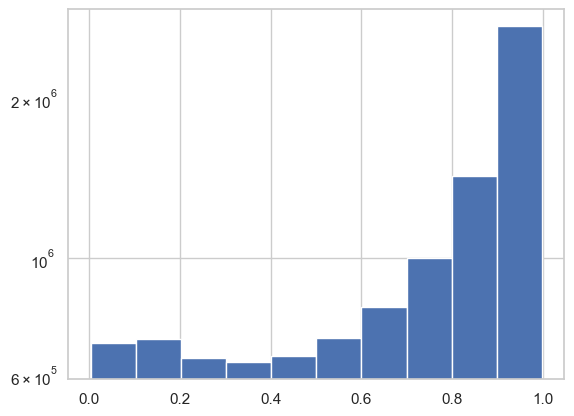

In [68]:
histogram_log(pred_probs2)

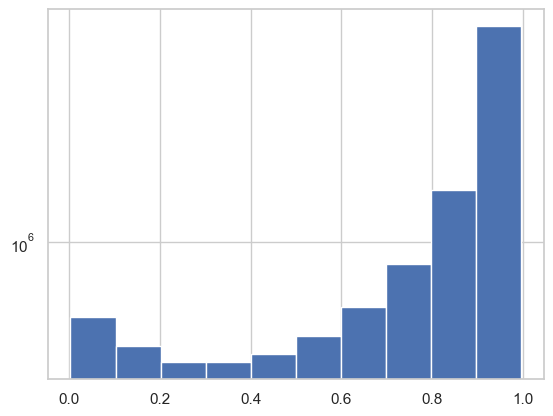

In [69]:
histogram_log(pred_probs3)

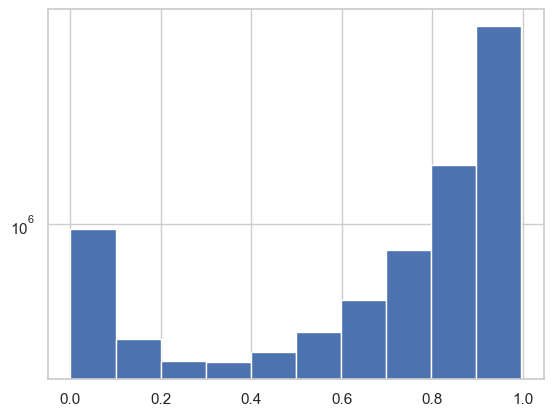

In [70]:
histogram_log(pred_probs4)

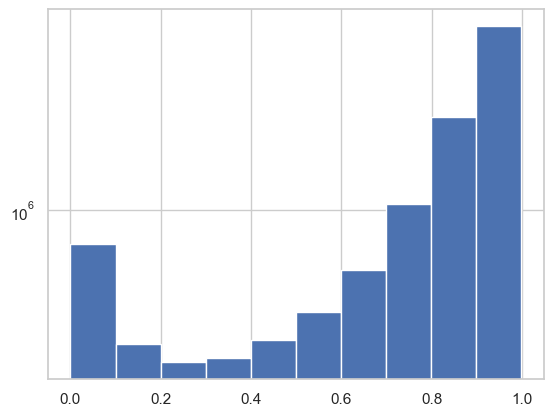

In [71]:
histogram_log(pred_probs5)

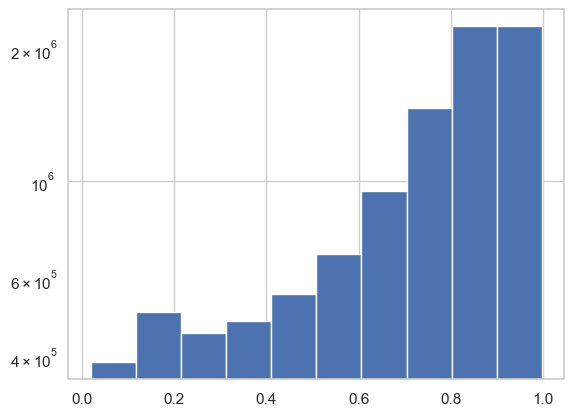

In [72]:
histogram_log(pred_probs6)

In [12]:
# Plot model performance and model uncertainty

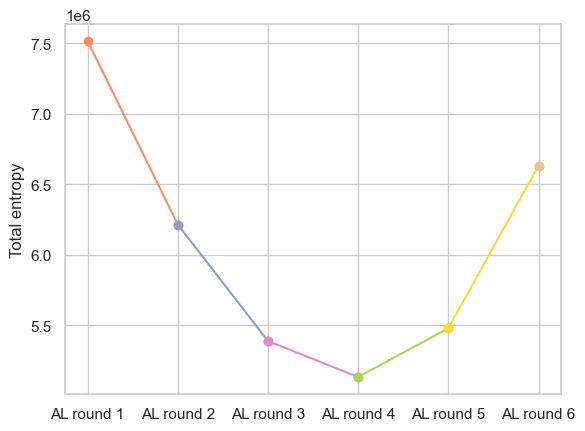

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the entropy values
p1 = 7516738.705192391
p2 = 6215625.23913797
p3 = 5389691.850804273
p4 = 5134646.987264483
p5 = 5480103.377297678
p6 = 6631983.190656676
p = [p1, p2, p3, p4, p5, p6]

# Use the Set2 palette from seaborn
palette = sns.color_palette("Set2")

# Plot the trend
# plt.figure(figsize=(6, 4))
for i in range(len(p) - 1):
    plt.plot([i, i+1], [p[i], p[i+1]], marker='o', color=palette[(i+1) % len(palette)], label=f'AL round {i+1}')
# Plot the last point separately
plt.plot(len(p)-1, p[-1], marker='o', color=palette[len(p) % len(palette)], label=f'AL round {len(p)}')

# plt.xlabel('AL round')
plt.ylabel('Total entropy')
plt.xticks([0, 1, 2, 3, 4, 5], ['AL round 1', 'AL round 2', 'AL round 3', 'AL round 4', 'AL round 5', 'AL round 6'])

# Show the plot
plt.show()


In [ ]:
# Plot variance for runs and testing performance

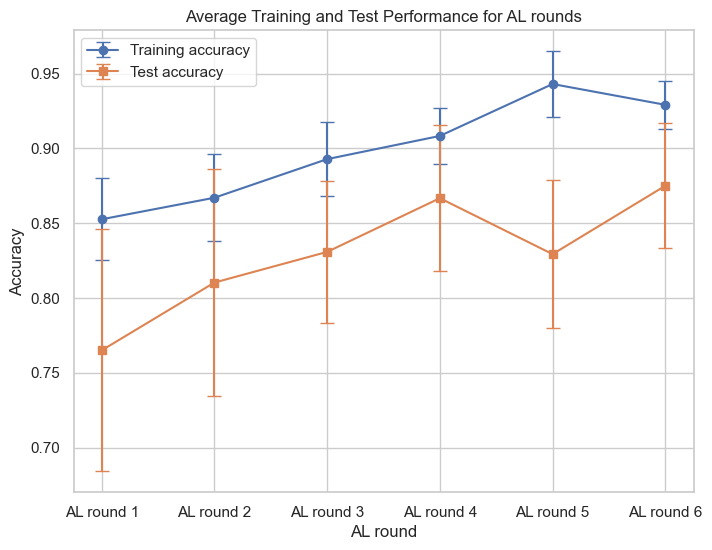

In [112]:
# Average training performance
p1 = 0.8526
p1_std = 0.0275
p2 = 0.8670
p2_std = 0.0289
p3 = 0.8928
p3_std = 0.0247
p4 = 0.9083
p4_std = 0.0185
p5 = 0.9430
p5_std = 0.0219
p6 = 0.9291
p6_std = 0.0159

t1 = 0.7650
t1_std = 0.0808
t2 = 0.8103
t2_std = 0.0759
t3 = 0.8308
t3_std = 0.0476
t4 = 0.8667
t4_std = 0.0486
t5 = 0.8293
t5_std = 0.0496
t6 = 0.8750
t6_std = 0.0417


p = [p1, p2, p3, p4, p5, p6]
t = [t1, t2, t3, t4, t5, t6]

# Average training and test performance
p = [p1, p2, p3, p4, p5, p6]
p_std = [p1_std, p2_std, p3_std, p4_std, p5_std, p6_std]
t = [t1, t2, t3, t4, t5, t6]
t_std = [t1_std, t2_std, t3_std, t4_std, t5_std, t6_std]

# Plot the trend with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(range(1, 7), p, yerr=p_std, fmt='o-', label='Training accuracy', capsize=5)
plt.errorbar(range(1, 7), t, yerr=t_std, fmt='s-', label='Test accuracy', capsize=5)

# Add labels and title
plt.xlabel('AL round')
plt.ylabel('Accuracy')
plt.title('Average Training and Test Performance for AL rounds')
plt.xticks(range(1, 7), ['AL round 1', 'AL round 2', 'AL round 3', 'AL round 4', 'AL round 5', 'AL round 6'])
plt.legend()
plt.grid(True)

# Show plot
plt.show()

/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_95202/3965248904.py:22: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, linestyle='--', alpha=0.7)


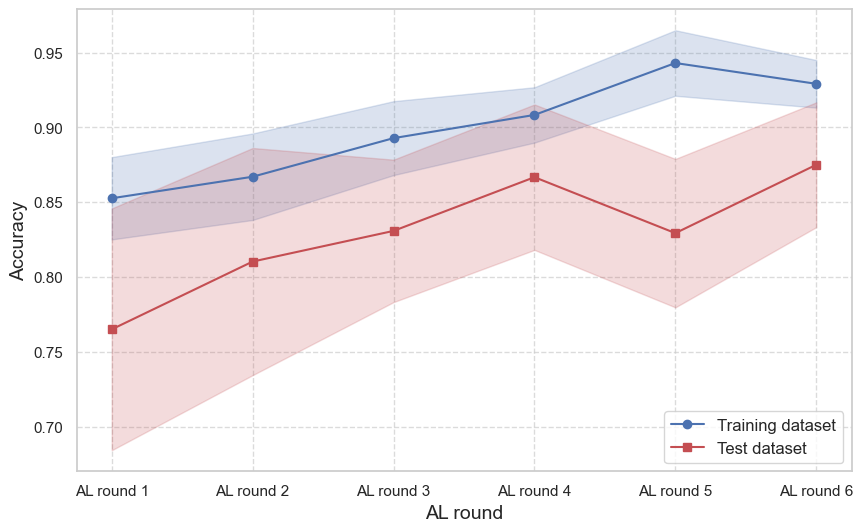

In [113]:
# Create rounds array
rounds = np.arange(1, 7)

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot training performance
plt.plot(rounds, p, marker='o', color='b', label='Training dataset')
plt.fill_between(rounds, np.array(p) - np.array(p_std), np.array(p) + np.array(p_std), color='b', alpha=0.2)

# Plot test performance
plt.plot(rounds, t, marker='s', color='r', label='Test dataset')
plt.fill_between(rounds, np.array(t) - np.array(t_std), np.array(t) + np.array(t_std), color='r', alpha=0.2)

# Customize the plot
plt.xlabel('AL round', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
# plt.title('Average Training and Test Performance for AL rounds', fontsize=16)
plt.xticks(rounds, ['AL round 1', 'AL round 2', 'AL round 3', 'AL round 4', 'AL round 5', 'AL round 6'])
plt.legend(loc='lower right', fontsize=12)
plt.grid(False, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [64]:
df_input_update = pd.read_csv('df_input_update_20240713.csv')
df_input_update.iloc[:, :7] = df_input_update.iloc[:, :7].apply(np.expm1)
# Input for classification model
df_input_update['num_vesicles'] = df_input_update['num_vesicles'].apply(lambda x: 0 if x < 1 else 1)

In [65]:
df_input_update['sum'] = df_input_update.iloc[:, :7].sum(axis=1)

In [67]:
df0 = df_input_update.iloc[0:48,:]
df0['sum'].min()

7.2325

In [121]:
df_input_update = pd.read_csv('df_input_update_20240713.csv')
df_input_update 

,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM),num_vesicles
0,0.615186,0.955511,1.231101,1.552868,1.677097,0.441476,0.579418,22
1,1.487270,0.644482,0.175633,1.056053,1.216395,0.207827,0.107059,9
2,1.163151,0.705570,1.294727,1.787584,1.658228,0.159138,0.202941,6
3,1.531476,1.787584,0.381855,0.071390,1.475907,0.589175,0.113329,2
4,1.170933,1.441019,1.677097,0.885832,1.011601,0.750236,0.300105,36
...,...,...,...,...,...,...,...,...
331,0.112435,0.107957,0.009950,0.639219,1.020651,0.000000,0.007968,0
332,0.019803,0.006976,0.064851,0.916291,0.821980,0.033918,0.045929,59
333,0.137150,0.076961,0.043059,0.548121,1.090244,0.013410,0.018822,2
334,0.013903,0.028587,0.092579,0.693147,0.974560,0.049742,0.036332,15


In [184]:
def performance_plot(df_input_update, fontsize):
    import matplotlib.ticker as ticker
    from matplotlib.ticker import ScalarFormatter
    path = 'PaperFig/'
    
    
    df_input_update.iloc[:, :7] = df_input_update.iloc[:, :7].apply(np.expm1)
    df_input_update['sum'] = df_input_update.iloc[:, :7].sum(axis=1)
    
    group_labels = np.repeat([1, 2, 3, 4, 5, 6, 7], 48)
    df_input_update['group'] = group_labels[:len(df_input_update)]
    
    vesicles = df_input_update[df_input_update['num_vesicles'] == 1]
    non_vesicles = df_input_update[df_input_update['num_vesicles'] == 0]
    
    # Average training performance
    p1 = 0.8526
    p1_std = 0.0275
    p2 = 0.8670
    p2_std = 0.0289
    p3 = 0.8928
    p3_std = 0.0247
    p4 = 0.9083
    p4_std = 0.0185
    p5 = 0.9430
    p5_std = 0.0219
    p6 = 0.9291
    p6_std = 0.0159
    
    t1 = 0.7650
    t1_std = 0.0808
    t2 = 0.8103
    t2_std = 0.0759
    t3 = 0.8308
    t3_std = 0.0476
    t4 = 0.8667
    t4_std = 0.0486
    t5 = 0.8293
    t5_std = 0.0496
    t6 = 0.8750
    t6_std = 0.0417
    
    
    p = [p1, p2, p3, p4, p5, p6]
    t = [t1, t2, t3, t4, t5, t6]
    
    # Average training and test performance
    p = [p1, p2, p3, p4, p5, p6]
    p_std = [p1_std, p2_std, p3_std, p4_std, p5_std, p6_std]
    t = [t1, t2, t3, t4, t5, t6]
    t_std = [t1_std, t2_std, t3_std, t4_std, t5_std, t6_std]
    
    rounds = np.arange(1, 7)
    
    u1 = 7516738.705192391
    u2 = 6215625.23913797
    u3 = 5389691.850804273
    u4 = 5134646.987264483
    u5 = 5480103.377297678
    u6 = 6631983.190656676
    u = [u1, u2, u3, u4, u5, u6]
    
    # Initialize the figure and subplots
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)
    
    # Plot 1
    sns.boxplot(x='group', y='sum', data=df_input_update, palette='Set2', width=0.8, ax=axs[0])
    sns.stripplot(x='group', y='sum', data=vesicles, palette='Set2', marker='o', size=8, edgecolor='black', linewidth=0.5, alpha=0.7, ax=axs[0])
    sns.stripplot(x='group', y='sum', data=non_vesicles, palette='Set2', marker='x', size=8, edgecolor='black', linewidth=1.9, alpha=0.7, ax=axs[0])
    axs[0].set_xlabel('')
    axs[0].set_ylabel('Total concentrations (mM)', fontsize=20)
    axs[0].set_xticks([0, 1, 2, 3, 4, 5, 6])
    # Manually set the y-axis limits after plotting
    axs[0].set_ylim(0, 20)
    
    # Check if the axis limits are applied correctly
    print(f"Y-axis limits for Plot 1: {axs[0].get_ylim()}")  
    
    axs[0].set_xticklabels([0, 1, 2, 3, 4, 5, 6], fontsize=fontsize)
    axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=fontsize)

    axs[0].legend(handles=[
        plt.Line2D([], [], color='black', marker='o', linestyle='None', markersize=10, label='Vesicles'),
        plt.Line2D([], [], color='black', marker='x', linestyle='None', markersize=10, label='Non-vesicles')
    ],  loc='upper left', bbox_to_anchor=(0.2, 1), frameon=False, fontsize = fontsize-3)
    axs[0].grid(False)
    
    
    # Plot 2
    axs[1].plot(rounds, p, marker='o', color='royalblue', label='Training dataset')
    axs[1].fill_between(rounds, np.array(p) - np.array(p_std), np.array(p) + np.array(p_std), color='royalblue', alpha=0.2)
    axs[1].plot(rounds, t, marker='s', color='firebrick', label='Test dataset')
    axs[1].fill_between(rounds, np.array(t) - np.array(t_std), np.array(t) + np.array(t_std), color='firebrick', alpha=0.2)
    
    
    # Add legend with manual positioning
    training_legend = plt.Line2D([], [], color='royalblue', marker='o', linestyle='None', markersize=8, label='Training')
    test_legend = plt.Line2D([], [], color='firebrick', marker='s', linestyle='None', markersize=8, label='Testing')
    training_legend_obj = axs[1].legend(handles=[training_legend], loc='upper left', bbox_to_anchor=(-0.03, 0.65), fontsize=fontsize-2,frameon=False,)
    axs[1].add_artist(training_legend_obj)  # Add the first legend manually
    axs[1].legend(handles=[test_legend], loc='lower left', bbox_to_anchor=(-0.03, 0.25), fontsize=fontsize-2, frameon=False,)
    axs[1].set_ylabel('Accuracy', fontsize=fontsize)
    axs[1].set_xticks([0, 1, 2, 3, 4, 5, 6])
    # axs[1].set_xticks(rounds)
    # axs[1].set_xticklabels(['AL round 1', 'AL round 2', 'AL round 3', 'AL round 4', 'AL round 5', 'AL round 6'], fontsize=14)
    axs[1].set_xticklabels([0, 1, 2, 3, 4, 5, 6], fontsize=fontsize)
    # axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=fontsize)
    axs[1].grid(False)  # Remove grid
    
    # Plot 3
    palette = sns.color_palette("Set2", n_colors=len(u) + 1)  # Ensure enough colors
    for i in range(len(u)-1):
        axs[2].plot([i+1, i+2], [u[i], u[i+1]], marker='o', color=palette[(i+1) % len(palette)], label=f'AL round {i+1}')
    axs[2].plot(len(u), u[-1], marker='o', color=palette[len(u) % len(palette)], label=f'AL round {len(u)}')
    axs[2].set_ylabel('Total entropy', fontsize=fontsize)
    axs[2].set_xticks([0, 1, 2, 3, 4, 5, 6])
    # axs[2].set_xticklabels(['AL round 1', 'AL round 2', 'AL round 3', 'AL round 4', 'AL round 5', 'AL round 6'], fontsize=14)
    # axs[2].legend(loc='best')
    axs[2].set_xticklabels([0, 1, 2, 3, 4, 5, 6], fontsize=fontsize)
    # axs[2].set_yticklabels(axs[2].get_yticks(), fontsize=fontsize)
    axs[2].legend(loc='lower left', frameon=False, fontsize=fontsize-2)
    axs[2].grid(False)  # Remove grid
    axs[2].set_xlabel('AL rounds', fontsize=fontsize)  # Only add x-axis label to the bottom plot
    
    # Disable scientific notation on y-axis
    axs[2].ticklabel_format(style='plain', axis='y')
    # Update y-axis tick labels to include scale notation
    def y_ticks_format(val, pos):
        return f'{val / 1e6:.1f}e6'
    axs[2].yaxis.set_major_formatter(plt.FuncFormatter(y_ticks_format))

    for ax in axs:
        ax.tick_params(axis='y', labelsize=17.2)
        ax.tick_params(axis='x', labelsize=17.2)  # Set x-tick labels fontsize to 14
        # Show x-ticks without labels (short vertical lines)
        for tick in ax.get_xticklabels():
            tick.set_visible(True)
    # # Plot the data in each subplot
    for ax in axs:
        ax.tick_params(axis='x', which='both', direction='in')
    
    # Adjust layout to remove space between subplots and align the plots
    plt.subplots_adjust(hspace=0)
    # plt.tight_layout()
    plt.savefig(path+ 'Performance.pdf', format='pdf', dpi=600, bbox_inches='tight')
    plt.show()

/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_75121/2468112295.py:68: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='group', y='sum', data=vesicles, palette='Set2', marker='o', size=8, edgecolor='black', linewidth=0.5, alpha=0.7, ax=axs[0])
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_75121/2468112295.py:69: FutureWarning: Passing `pal

Y-axis limits for Plot 1: (0.0, 20.0)


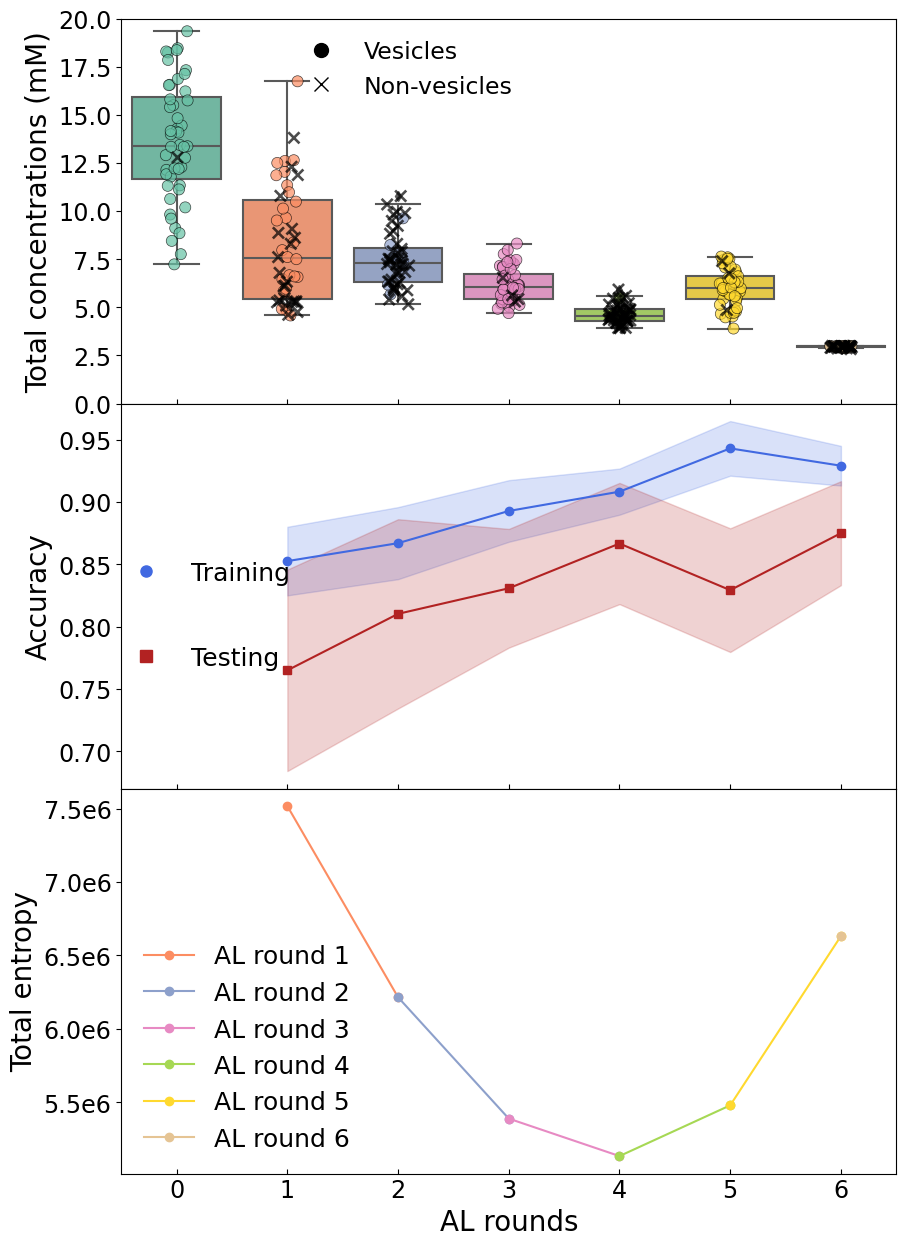

In [185]:
performance_plot(df_input_update, fontsize=20)

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

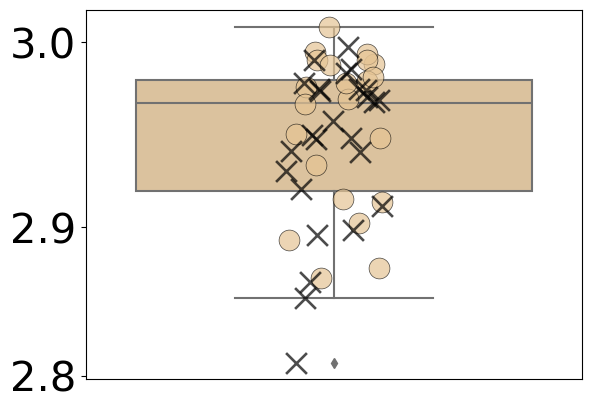

In [71]:
palette = sns.color_palette("Set2")
color_7th = palette[6]
# Take a closer look at this round plot
path ='PaperFig/'

df_input_update.iloc[:, :7] = df_input_update.iloc[:, :7].apply(np.expm1)

df_input_update['sum'] = df_input_update.iloc[:, :7].sum(axis=1)

# Split the DataFrame into 6 groups of 48 rows and add a 'group' column
group_labels = np.repeat([1, 2, 3, 4, 5, 6, 7], 48)
df_input_update['group'] = group_labels[:len(df_input_update)]

# Filter the DataFrame to include only the last round (group 7)
last_round_df = df_input_update[df_input_update['group'] == 7]

# Separate data for vesicles and non-vesicles in the last round
vesicles_last_round = last_round_df[last_round_df['num_vesicles'] == 1]
non_vesicles_last_round = last_round_df[last_round_df['num_vesicles'] == 0]

# Initialize the figure
# plt.figure(figsize=(10, 6))

# Create a box plot with Seaborn for the last round
sns.boxplot(x='group', y='sum', data=last_round_df, color=color_7th, width=0.8)

# Overlay a scatter plot for vesicles in the last round
sns.stripplot(x='group', y='sum', data=vesicles_last_round, color=color_7th, marker='o', size=15, edgecolor='black', linewidth=0.5, alpha=0.7)

# Overlay a scatter plot for non-vesicles in the last round
sns.stripplot(x='group', y='sum', data=non_vesicles_last_round, color=color_7th, marker='x', size=15, edgecolor='black', linewidth=1.9, alpha=0.7)

# Add labels and title
# plt.xlabel('')
# plt.ylabel('Total concentrations', fontsize=20)
# plt.xticks(ticks=[0], labels=['AL_round6'], fontsize=16)  # Only label for AL_round6
plt.yticks(ticks=[2.82, 2.9, 3.0], fontsize=30)
plt.gca().set_yticklabels([f'{tick:.1f}' for tick in [2.82, 2.9, 3.0]])

plt.xticks([])
# Add custom legend
import matplotlib.lines as mlines

vesicles_legend = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=8, label='Vesicles')
non_vesicles_legend = mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=8, label='Non-vesicles')

# plt.legend(handles=[vesicles_legend, non_vesicles_legend])

# Remove x and y labels
plt.xlabel('')
plt.ylabel('')
plt.savefig(path+ 'Performance_small.pdf', format='pdf', dpi=600, bbox_inches='tight')

plt.show()

### PCA loading plot (renaming monocaprin to glycerol monodecanoate (GMD))

In [24]:
df_input_update = pd.read_csv('df_input_update_20240713.csv')
df_input_update['num_vesicles'] = df_input_update['num_vesicles'].apply(lambda x: 0 if x < 1 else 1)

In [25]:
# change the column name
df_input_update.columns.values[6] = 'glycerol monodecanoate_Concentration (mM)'

In [26]:
# get data set for AL round
df0 = df_input_update.iloc[0:48, :]
df1 = df_input_update.iloc[0:48+48, :]
df2 = df_input_update.iloc[0:48+48*2, :]
df3 = df_input_update.iloc[0:48+48*3, :]
df4 = df_input_update.iloc[0:48+48*4, :]
df5 = df_input_update.iloc[0:48+48*5, :]
df6 = df_input_update.iloc[0:48+48*6, :]

In [27]:
X2 = df2.iloc[:,0:7].values
y2 = df2.iloc[:,-1:].values.ravel()

X3 = df3.iloc[:,0:7].values
y3 = df3.iloc[:,-1:].values.ravel()

X4 = df4.iloc[:,0:7].values
y4 = df4.iloc[:,-1:].values.ravel()

X5 = df5.iloc[:,0:7].values
y5 = df5.iloc[:,-1:].values.ravel()

X6 = df6.iloc[:,0:7].values
y6 = df6.iloc[:,-1:].values.ravel()

In [28]:
# Reduce dimensions using PCA for visualization
from sklearn.decomposition import PCA


In [37]:
def GPC_visualize(X, y, model, AL_round):
    path ='PaperFig/'
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    
    # Create a mesh grid for plotting
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict on the mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_original_space = pca.inverse_transform(grid_points)
    probs = model.predict_proba(grid_points_original_space)
    probs_class_1 = probs[:, 1].reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, probs_class_1, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # plt.savefig(path+ 'DecisionBoundary_AL2.pdf', format='pdf', dpi=600, bbox_inches='tight')
    
    plt.show()

    # Get the loadings for the first two PCs
    loadings = pca.components_[:2, :]
    
    # Feature names
    feature_names = ['decanoic acid (mM)', 'decanoate (mM)',
                     'decylamine (mM)', 'decyl trimethylamine (mM)',
                     'decylsulfate (mM)', 'decanol (mM)',
                     'glycerol monodecanoate (mM)']
    
    # Create a DataFrame for better visualization
    loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=feature_names)
    
    # Plot loadings with arrows
    plt.figure(figsize=(10, 8))
    # plt.title('Loading Plot: Importance of Features in PC1 and PC2')
    
    # Scale factor for the arrows to make them visually appealing
    scale_factor = 1.1
    
    for feature in loadings_df.index:
        plt.arrow(0, 0, loadings_df.loc[feature, 'PC1'] * scale_factor, loadings_df.loc[feature, 'PC2'] * scale_factor,
                  color='r', alpha=0.5, width=0.008, head_width=0.05)
        plt.text(loadings_df.loc[feature, 'PC1'] * scale_factor * 1.1, loadings_df.loc[feature, 'PC2'] * scale_factor * 1.1,
                 feature, color='black', ha='center', va='center', fontsize=18)
    
    # Set x and y limits based on PC1 and PC2 range
    pc1_min, pc1_max = X_reduced[:, 0].min(), X_reduced[:, 0].max()
    pc2_min, pc2_max = X_reduced[:, 1].min(), X_reduced[:, 1].max()
    plt.xlim(pc1_min - 0.05, pc1_max + 0.05)
    plt.ylim(pc2_min - 0.05, pc2_max + 0.05)
    
    # plt.xlabel('PC1')
    # plt.ylabel('PC2')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig(path+ f'LoadingPloat_{AL_round}_rename.pdf', format='pdf', dpi=600, bbox_inches='tight')
    
    plt.show()

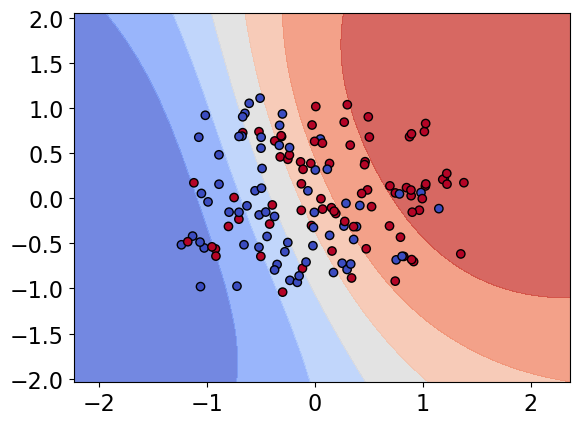

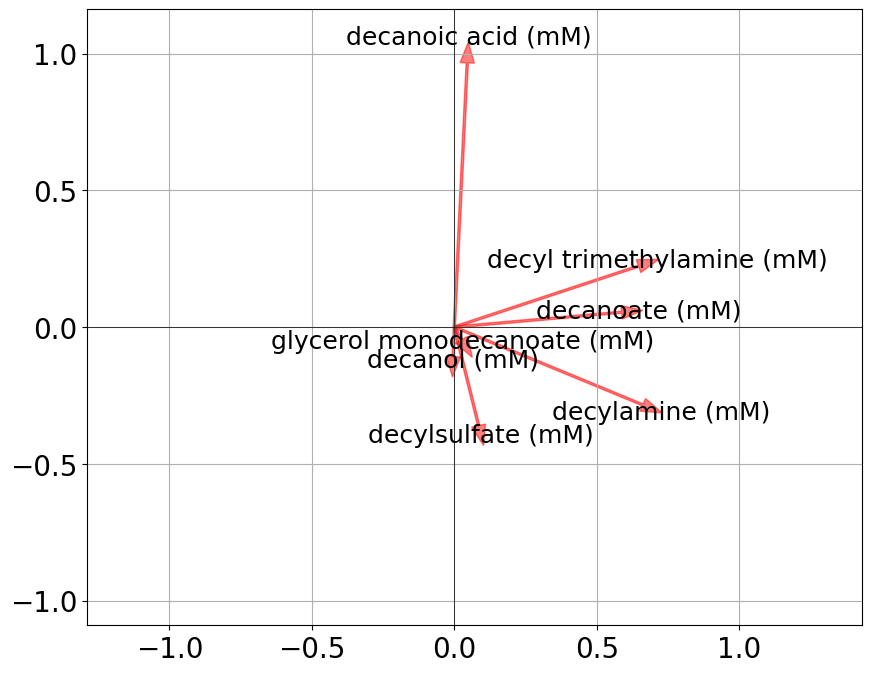

In [38]:
GPC_visualize(X2, y2, model2, 'AL2')

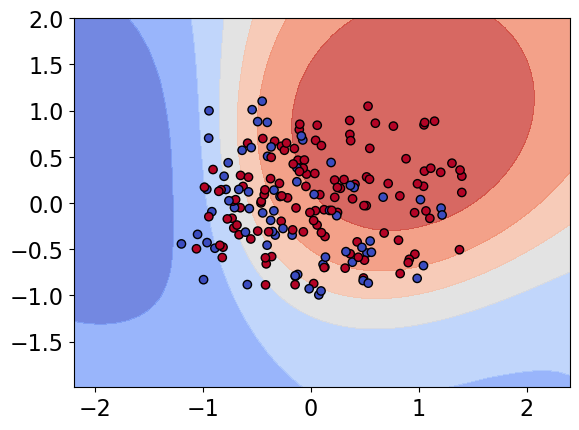

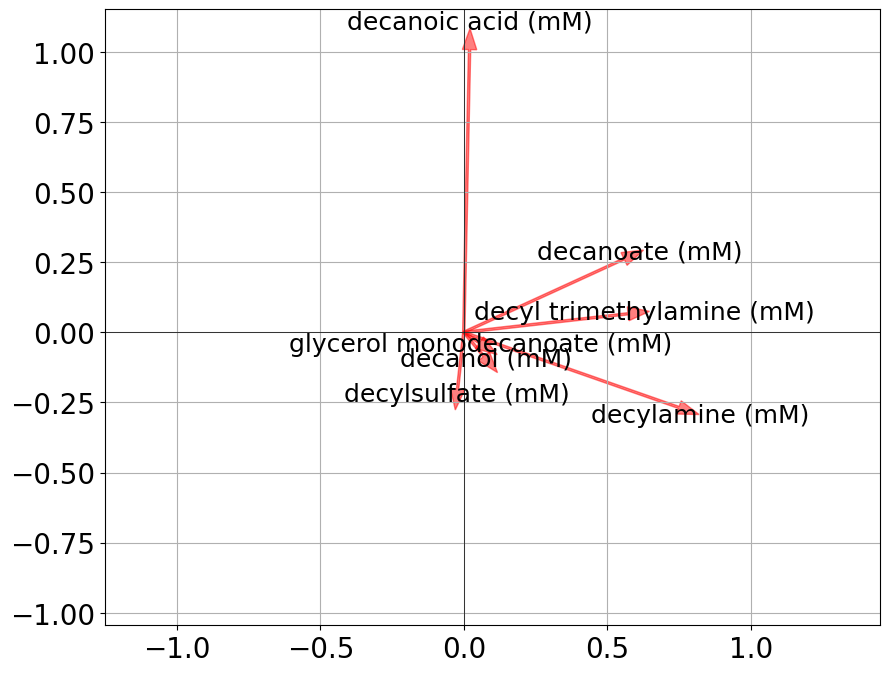

In [39]:
GPC_visualize(X3, y3, model3, 'AL3')

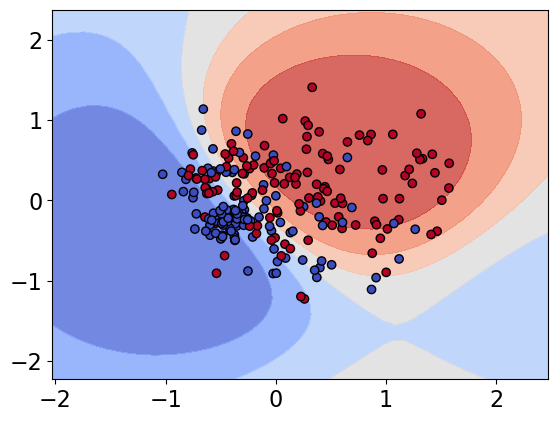

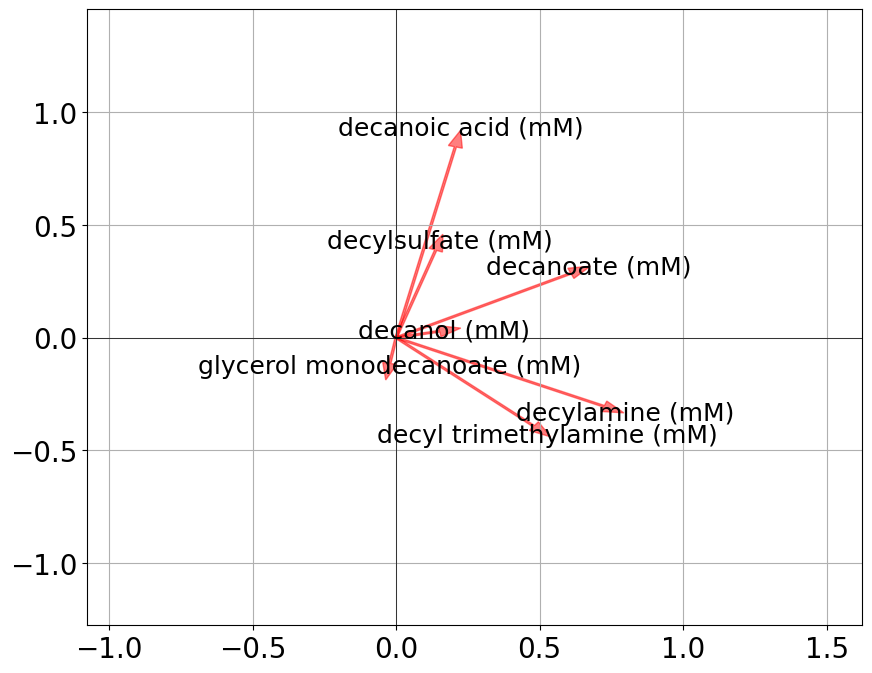

In [40]:
GPC_visualize(X4, y4, model4, 'AL4')

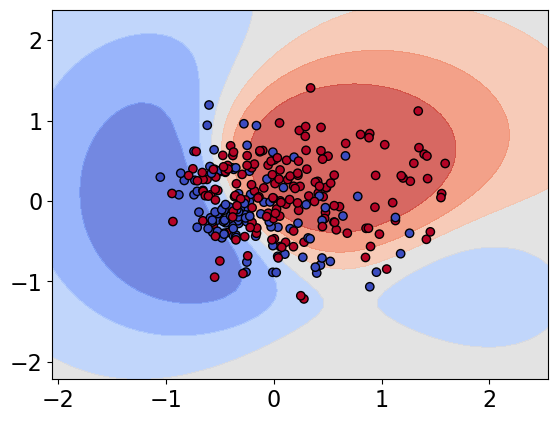

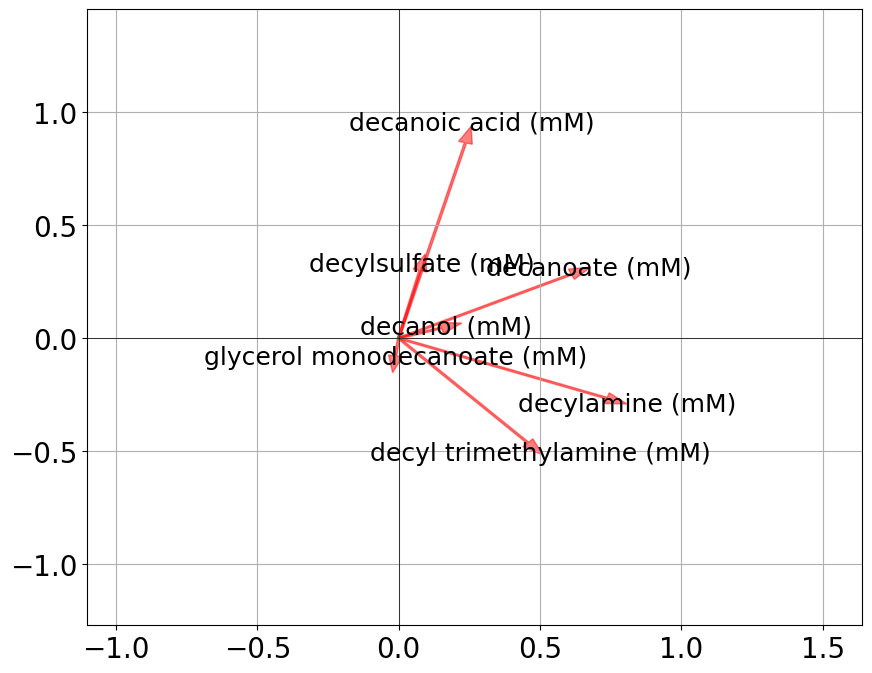

In [42]:
GPC_visualize(X5, y5, model5, 'AL5')

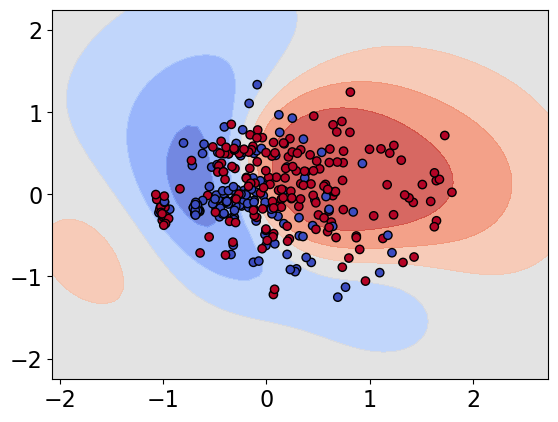

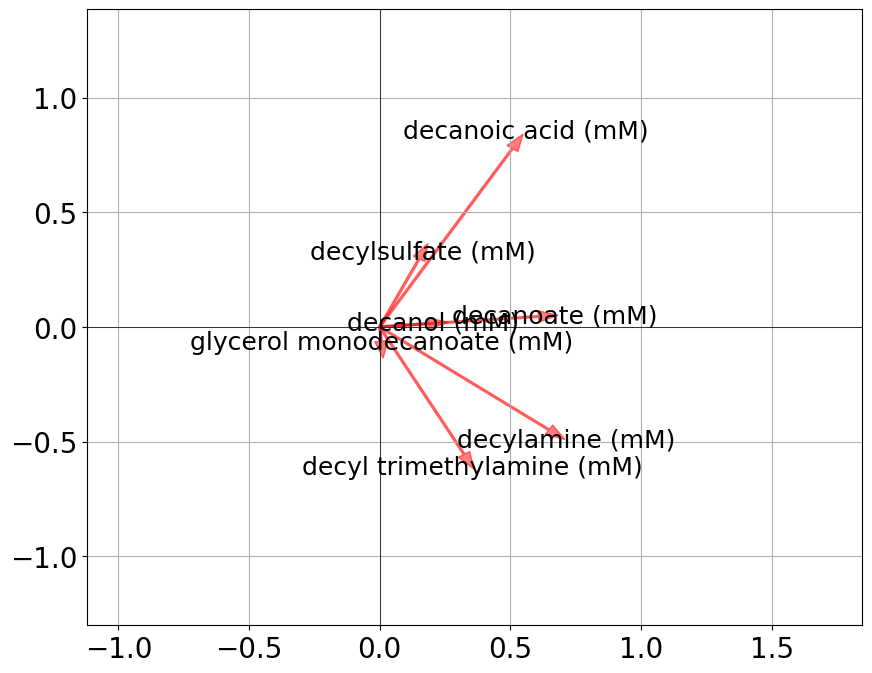

In [43]:
GPC_visualize(X6, y6, model6, 'AL6')

In [47]:
feature_names = ['decanoic acid', 'decanoate',
                     'decylamine', 'decyl trimethylamine',
                     'decylsulfate', 'decanol',
                     'glycerol monodecanoate']

### Look at data distribution in 2D space

In [117]:
import umap
from sklearn.manifold import Isomap, TSNE

In [122]:
df_input_update

,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM),num_vesicles
0,0.615186,0.955511,1.231101,1.552868,1.677097,0.441476,0.579418,22
1,1.487270,0.644482,0.175633,1.056053,1.216395,0.207827,0.107059,9
2,1.163151,0.705570,1.294727,1.787584,1.658228,0.159138,0.202941,6
3,1.531476,1.787584,0.381855,0.071390,1.475907,0.589175,0.113329,2
4,1.170933,1.441019,1.677097,0.885832,1.011601,0.750236,0.300105,36
...,...,...,...,...,...,...,...,...
331,0.112435,0.107957,0.009950,0.639219,1.020651,0.000000,0.007968,0
332,0.019803,0.006976,0.064851,0.916291,0.821980,0.033918,0.045929,59
333,0.137150,0.076961,0.043059,0.548121,1.090244,0.013410,0.018822,2
334,0.013903,0.028587,0.092579,0.693147,0.974560,0.049742,0.036332,15


In [4]:
from sklearn.manifold import TSNE

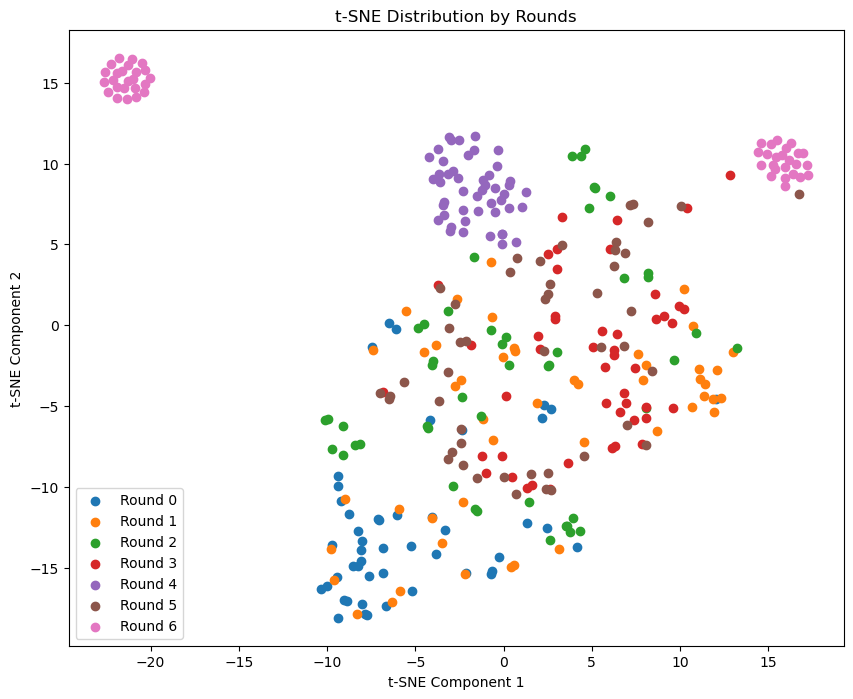

In [7]:
X = df_input_update.iloc[:, :7]  # First 7 columns as input features
y = df_input_update.iloc[:, -1]  # Last column as output results

# Number of rounds
rounds = df_input_update.shape[0] // 48

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE with different colors for each round
plt.figure(figsize=(10, 8))

for i in range(rounds):
    plt.scatter(X_tsne[i*48:(i+1)*48, 0], X_tsne[i*48:(i+1)*48, 1], label=f'Round {i}')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Distribution by Rounds')
plt.legend()
plt.show()

In [ ]:
# pca

/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_85885/2587885980.py:22: UserWarning:

The palette list has more values (10) than needed (7), which may not be intended.



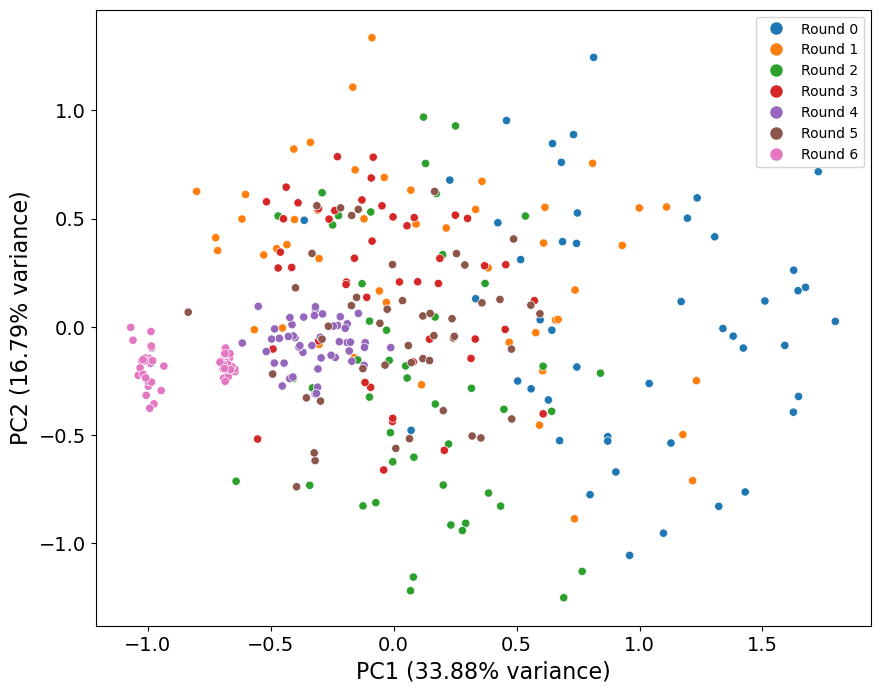

In [90]:
save_path='PaperFig/'
# Assuming df_input_update is your DataFrame
input_features = df_input_update.iloc[:, :7].values
output_results = df_input_update.iloc[:, 7].values

# Perform PCA
pca = PCA(n_components=2)  # Keep only 2 principal components for 2D plot
principal_components = pca.fit_transform(input_features)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Add the principal components and the round information to the DataFrame
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_pca['AL Round'] = (df_pca.index // 48) + 1  # Calculate round number based on the index

# Define a fixed color palette
palette = sns.color_palette()

# Plotting
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='PC1', y='PC2',
    hue='AL Round',
    palette=palette,
    data=df_pca,
    legend=False,
)

# Increase the font size of axis label ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Customizing the legend manually
new_labels = [f'Round {i}' for i in range(7)]  # Create custom labels
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10) for i in range(7)]
plt.legend(handles, new_labels, loc='best')

# Labels
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)', fontsize=16)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)', fontsize=16)

# Save the figure with high resolution and tight layout
plt.savefig(save_path+'PCA_ALrounds.pdf', format='pdf', dpi=600, bbox_inches='tight')

### Feature importance

In [ ]:
# redo shap plot with new columns name

In [55]:
df_input_update = pd.read_csv('df_input_update_20240713.csv')
df_input_update['num_vesicles'] = df_input_update['num_vesicles'].apply(lambda x: 0 if x < 1 else 1)
# rename columns
feature_names = ['decanoic acid', 'decanoate',
                     'decylamine', 'decyl trimethylamine',
                     'decylsulfate', 'decanol',
                     'glycerol monodecanoate']
# Rename the first 7 columns of df_input_update
df_input_update.columns.values[:7] = feature_names
df_input_update.columns

Index(['decanoic acid', 'decanoate', 'decylamine', 'decyl trimethylamine',
       'decylsulfate', 'decanol', 'glycerol monodecanoate', 'num_vesicles'],
      dtype='object')

(336, 7)


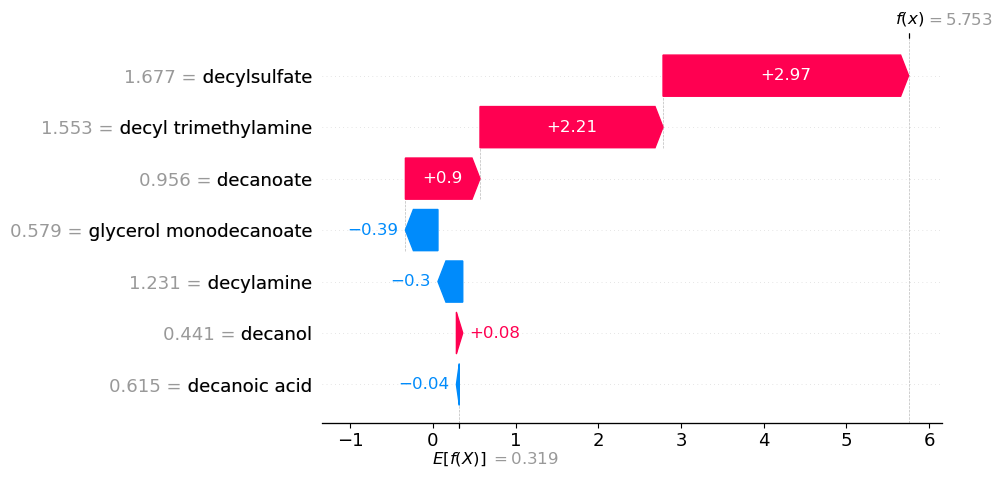

In [56]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb

input_features = df_input_update.iloc[:, :7]
output_results = df_input_update.iloc[:, 7]
X=input_features
y=output_results

# Train a Classifier model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
model= xgb.XGBClassifier(objective="binary:logistic")

model.fit(X, y)

# Initialize SHAP explainer
explainer = shap.Explainer(model)
# this is different for tree based model
# explainer = shap.TreeExplainer(cls)

shap_values_bin = explainer(X)
print(shap_values_bin.shape)

# waterfall plot for first instance
shap.plots.waterfall(shap_values_bin[0])

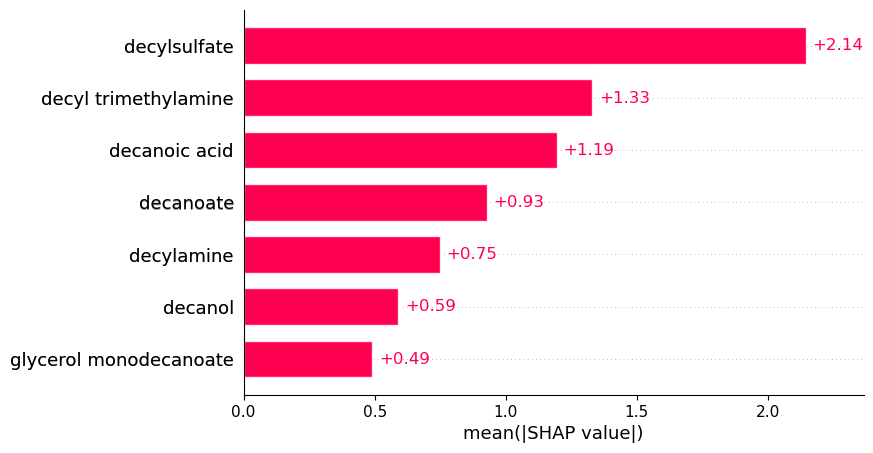

In [57]:
shap.plots.bar(shap_values_bin)

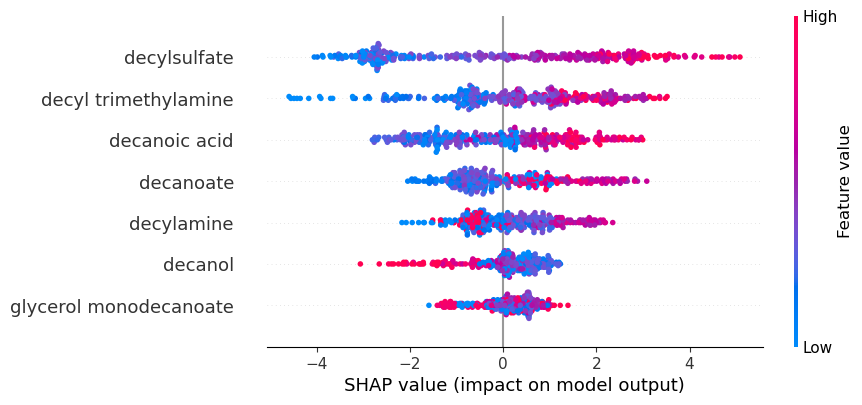

In [58]:
shap.plots.beeswarm(shap_values_bin)

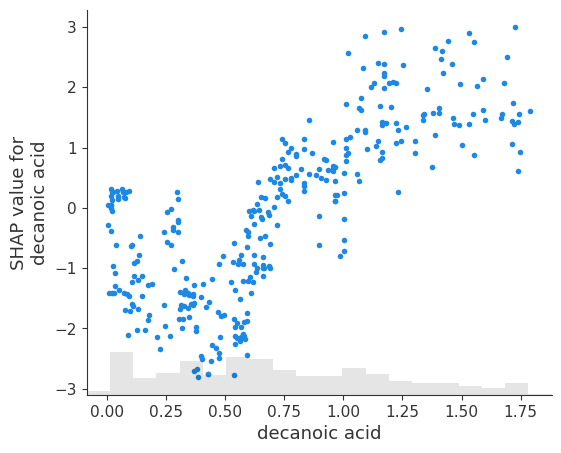

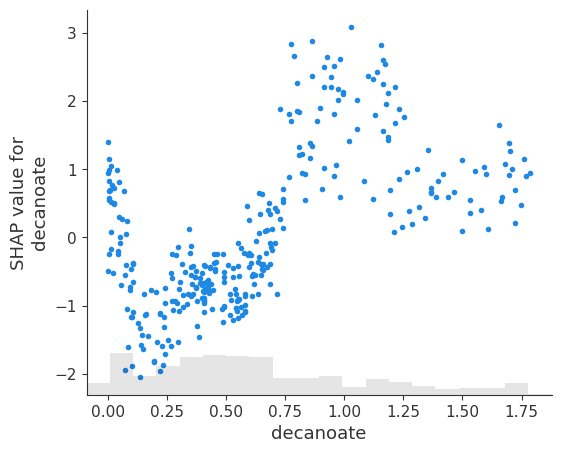

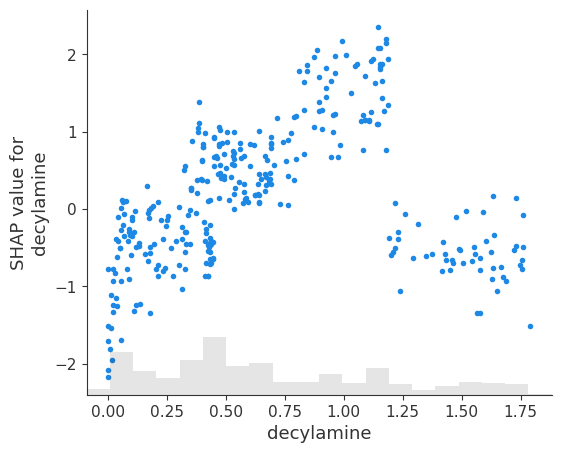

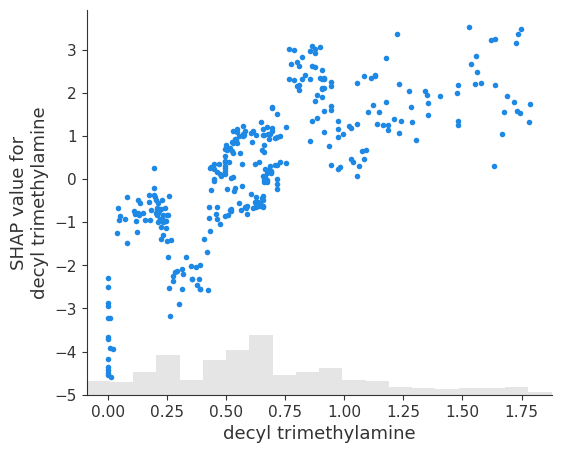

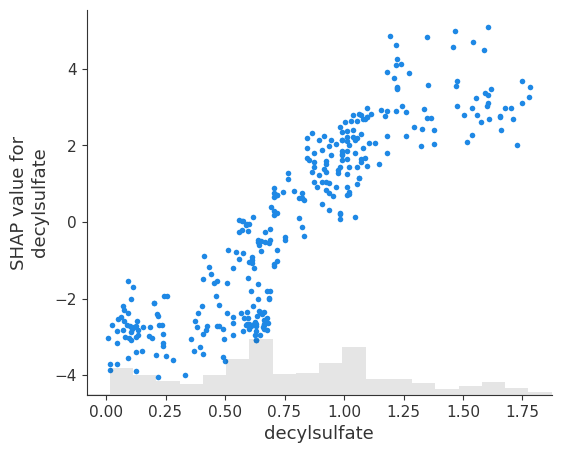

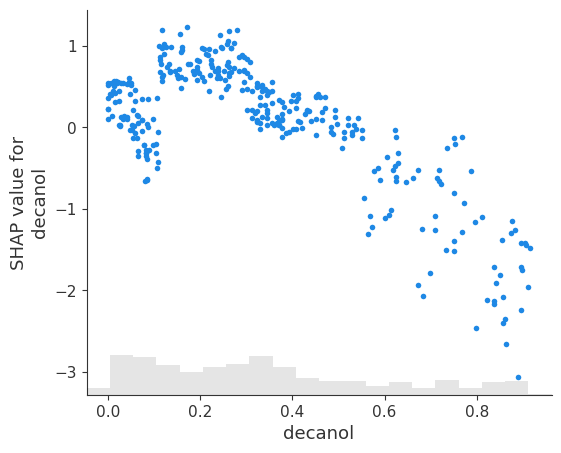

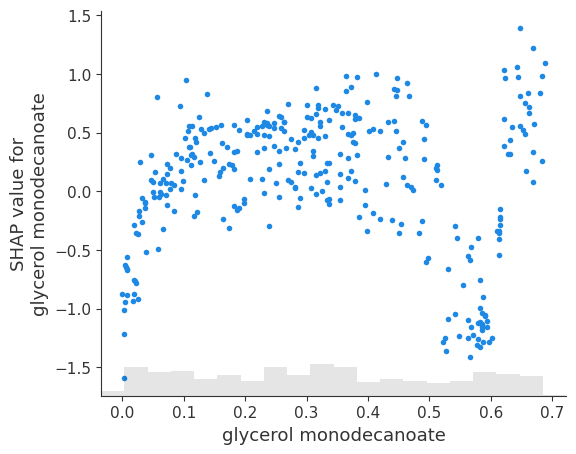

In [59]:
for i in X.columns:
    shap.plots.scatter(shap_values_bin[:, i])